In [2]:
from matplotlib.image import imread
import os

image = imread(os.path.join('images','ladybug.jpg'))

image.shape

(1068, 1900, 3)

In [3]:
X = image.reshape(-1,3)

In [4]:
X.shape

(2029200, 3)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)

In [6]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [7]:
segmented_image = segmented_image.reshape(image.shape)

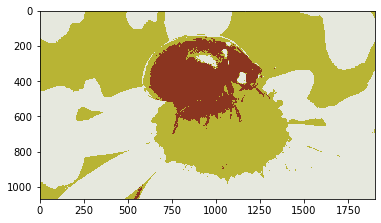

In [8]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.imshow(segmented_image.astype(int),interpolation='nearest')

plt.show()

In [9]:
segmented_image


array([[[230.82744356, 232.97444943, 222.41509986],
        [230.82744356, 232.97444943, 222.41509986],
        [230.82744356, 232.97444943, 222.41509986],
        ...,
        [184.8319399 , 180.86370865,  52.29682337],
        [184.8319399 , 180.86370865,  52.29682337],
        [184.8319399 , 180.86370865,  52.29682337]],

       [[230.82744356, 232.97444943, 222.41509986],
        [230.82744356, 232.97444943, 222.41509986],
        [230.82744356, 232.97444943, 222.41509986],
        ...,
        [184.8319399 , 180.86370865,  52.29682337],
        [184.8319399 , 180.86370865,  52.29682337],
        [184.8319399 , 180.86370865,  52.29682337]],

       [[230.82744356, 232.97444943, 222.41509986],
        [230.82744356, 232.97444943, 222.41509986],
        [230.82744356, 232.97444943, 222.41509986],
        ...,
        [184.8319399 , 180.86370865,  52.29682337],
        [184.8319399 , 180.86370865,  52.29682337],
        [184.8319399 , 180.86370865,  52.29682337]],

       ...,

      

## using kmeans for preprocessing

In [12]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

X_digits.shape

(1797, 64)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

log_ref = LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)

log_ref.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [17]:
log_ref.score(X_test,y_test)

0.9688888888888889

In [18]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_ref", LogisticRegression(multi_class="ovr", solver="lbfgs",max_iter=5000,random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_ref',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [19]:
pipeline.score(X_test,y_test)

0.98

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))

grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)

grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] k

[CV] ............................ kmeans__n_clusters=21, total=   2.4s
[CV] kmeans__n_clusters=21 ...........................................
[CV] ............................ kmeans__n_clusters=21, total=   2.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.3s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.5s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.6s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.7s
[CV] kmeans__n_clusters=23 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=40, total=   3.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   3.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   3.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   3.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.9s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.5s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   4.6s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   4.6s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   4.8s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   4.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   4.8s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   4.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   4.7s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   5.2s
[CV] kmeans__n_clusters=79 ...........................................
[CV] ............................ kmeans__n_clusters=79, total=   5.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   5.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   5.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   5.4s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   5.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   5.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=98, total=   5.3s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   4.9s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   5.7s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   4.9s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 18.1min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_ref',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [22]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [23]:
grid_clf.score(X_test, y_test)

0.98

In [24]:
n_labeled = 50

log_ref = LogisticRegression(multi_class="ovr", solver="lbfgs" , random_state=42)

log_ref.fit(X_train[:n_labeled], y_train[:n_labeled])

log_ref.score(X_test,y_test)

0.8333333333333334

In [26]:
import numpy as np
k = 50


kmeans = KMeans(n_clusters=k, random_state=42)

X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis=0)
X_representative_digits = X_train[representative_digit_idx]

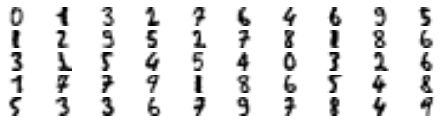

In [28]:
plt.figure(figsize=(8,2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10,10,index+1)
    
    plt.imshow(X_representative_digit.reshape(8,8),cmap="binary",interpolation="bilinear")
    
    plt.axis("off")
    


plt.show()
    

In [30]:
y_representative_digits = np.array([
    0,1,3,2,7,6,4,6,9,5,
    1,2,9,5,2,7,8,8,8,6,
    3,1,5,4,5,4,0,3,2,6,
    1,7,7,9,1,8,6,5,4,8,
    5,3,3,6,7,9,7,8,4,9
])

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000,random_state=42)

log_reg.fit(X_representative_digits, y_representative_digits)

log_reg.score(X_test, y_test)

0.9133333333333333

In [40]:
y_train_propagated= np.empty(len(X_train), dtype=np.int32)


for i in range(k):

    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
    


[13 14 26 ... 39  4 10]


In [42]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",max_iter=5000,random_state=42)

log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [44]:
log_reg.score(X_test, y_test)

0.9333333333333333

In [46]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [50]:
partially_propagated=  (X_cluster_dist != -1)

X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]



In [51]:
log_ref = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_ref.fit(X_train_partially_propagated, y_train_partially_propagated)



LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [52]:
log_reg.score(X_test,y_test)

0.9333333333333333